#Project 1. Create a tree bloom classifier to distinguish cherry-like blooms.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
%cd '/content/drive/My Drive/Colab Notebooks'
# %mkdir projects

/content/drive/My Drive/Colab Notebooks


In [11]:
# %mkdir projects/tree_bloom
%cd projects/tree_bloom

/content/drive/My Drive/Colab Notebooks/projects/tree_bloom


In [0]:
! pip install fastai2
! pip install utils

In [0]:
from utils import *
from fastai2.vision.widgets import *
from fastai2 import *

In [0]:
from fastai2.vision.all import *

#first create bloom dataset

In [0]:
key = '61599d15b0c14642bd1639d4e85b8ff9'

In [0]:
search_images_bing

In [0]:
results = search_images_bing(key, 'cherry flower blooom')
ims = results.attrgot('content_url')
len(ims)

In [0]:
class_col = ['cherry', 'crabapple', 'pear']
class_col

path = Path('data')

In [0]:
if not path.exists():
    path.mkdir()
    for o in class_col:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} flower bloom')
        download_images(dest, urls=results.attrgot('content_url'))

In [36]:
fns = get_image_files(path)
fns

(#795) [Path('data/cherry/00000201.jpg'),Path('data/cherry/00000200.jpg'),Path('data/cherry/00000204.jpg'),Path('data/cherry/00000205.jpg'),Path('data/cherry/00000203.jpg'),Path('data/cherry/00000206.jpg'),Path('data/cherry/00000202.jpg'),Path('data/cherry/00000207.jpg'),Path('data/cherry/00000208.jpg'),Path('data/cherry/00000212.jpg')...]

In [37]:
failed = verify_images(fns)
failed

(#0) []

In [0]:
failed.map(Path.unlink);

# Now we can create a databunch, and explore the data we downloaded

In [0]:
# tfms = get_transforms(do_flip=True)
# doc(get_transforms)

In [0]:
bloom = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [0]:
dls = bloom.dataloaders(path)

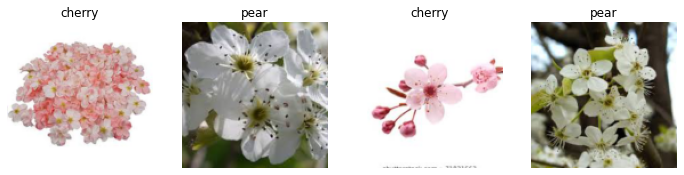

In [102]:
dls.valid.show_batch(max_n=4, nrows=1)

# add data augenmentation in the data and re-create data loader

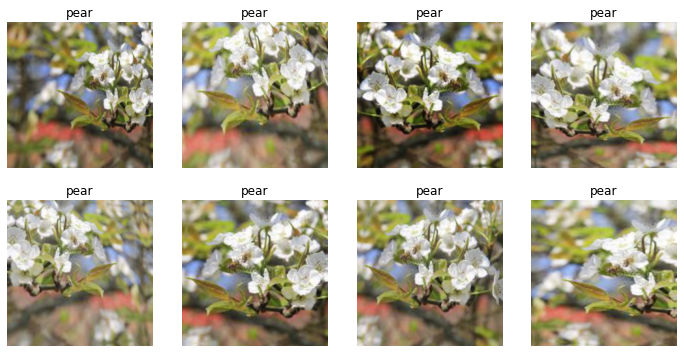

In [103]:
bloom = bloom.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bloom.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

#Train model

In [0]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [105]:
learn

In [107]:
learn.fine_tune(3)

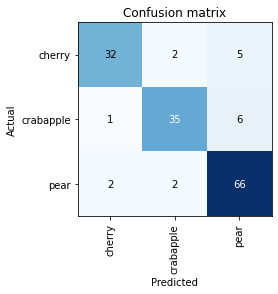

In [108]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

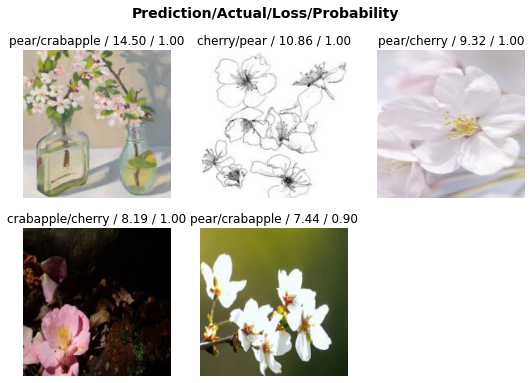

In [109]:
interp.plot_top_losses(5, nrows=2)

In [90]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [0]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [0]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

now can check the learning rate in the fine-tune step.

# Export model

In [0]:
learn.export( fname= 'bloom_v2.pkl')

In [117]:

path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('bloom_v2.pkl')]

In [0]:
learn_inf = load_learner(path/'bloom_v2.pkl')

#check results

In [110]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [0]:
img = PILImage.create(btn_upload.data[-1])

In [112]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [119]:
pred,pred_idx,probs = learn_inf.predict(img)

In [120]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: crabapple; Probability: 0.9999')

In [121]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [0]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [0]:

#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [125]:
VBox([widgets.Label('Select your bloom!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [126]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 5.9MB 7.3MB/s 
     |████████████████████████████████| 184kB 46.0MB/s 
     |████████████████████████████████| 921kB 57.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
